In [1]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Fit the model/algorithm on our data and use it to make predictions
### Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `Y` = labels, targets, target variables

In [2]:
# Get classifiaction problem data
heart_disease = pd.read_csv("heart-disease.csv")
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#look at the map for sklearn and what model should you use
from sklearn.ensemble import RandomForestClassifier

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# prescribe algorithm to var
clf = RandomForestClassifier()

# Fit the model to the data (training)
clf.fit(X_train, y_train)
# use the patterns our model has learned and check the predicted data against target data (predicted-test)
clf.score(X_test, y_test)

0.8524590163934426

### Make predictions using ML model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [3]:
X_test.head() #would be example of a structure for predict data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [4]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [5]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [6]:
# compare predicitons to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [7]:
# exact same thing
clf.score(X_test, y_test)

0.8524590163934426

In [8]:
# one more way of doing this
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [9]:
# make predictions with predict_proba
# it returnes probabilities of classification label (probability for 1 and 0 in our case)
clf.predict_proba(X_test[:5])
#this is looking at the first 5 labels and how much is probability for each 1 or 0 based on provided features
#we can use it to pinpoint model's confidence or set that it only returns labels when probability is greater than imagined number

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [10]:
# Let's predict on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [11]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [15]:
y_preds[:10] #not same values as the data

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [16]:
len(y_preds)
len(y_test)

4128

In [20]:
# we can substract y_test from y_test and get mean value -> mean absolute error (statistics)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds) #tells us that predictions are on averedge 0.32 different than the actual labels

0.32659871732073664

## Evaluating ML model

Three ways to evaluate sklearn models/estimators:
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

Can be found at: https://scikit-learn.org/stable/modules/model_evaluation.html

### Evaluating model with a score method

In [22]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
clf.score(X_test, y_test)

0.8524590163934426

Let's use `score()` on our regression problem

In [25]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
model.score(X_test, y_test) # coefficient of determination R**2 for regression algorithems

0.8065734772187598

### Evaluating a model using the `scoring` parameter

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
clf.score(X_test, y_test)

0.8524590163934426

In [40]:
cross_val_score(clf, X, y, cv=5) #evaluating a score with cross validation
#cv stands for cross validation -> in our instance we are doing 5-fold cross-validation
# Model is trained on 5 different versions of training data and evaluated on 5 different versions of test data

array([0.81967213, 0.90163934, 0.86885246, 0.8       , 0.78333333])

In [42]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score # CV is better for reporting MODEL accuracy

(0.8524590163934426, 0.8248087431693989)

In [44]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [46]:
# Scoring param set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None) #default scoring is None

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve (evaluation metrics for binary classification models)
3. Confusion matrix
4. Classification report

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [51]:
np.mean(cross_val_score(clf, X, y, cv=5))

0.8018032786885245

In [56]:
print(f"heart disease Classifier cross-validated accuracy: {np.mean(cross_val_score(clf, X, y, cv=5))*100:.2f}%")

heart disease Classifier cross-validated accuracy: 82.15%


**Area under reciever operating characteristics curve (AUC | ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (trp) vs a models false positive rate (fpr).

* True positive = model predicts 1 when trth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
from sklearn.metrics import roc_curve

clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.48, 0.52],
       [0.5 , 0.5 ],
       [0.88, 0.12],
       [0.13, 0.87],
       [0.13, 0.87],
       [0.29, 0.71],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.57, 0.43]])

In [62]:
y_probs_positive = y_probs[:, 1] #only column 1 of every row
y_probs_positive[:10]

array([0.11, 0.52, 0.5 , 0.12, 0.87, 0.87, 0.71, 0.03, 0.01, 0.43])

In [63]:
# Calculate fpr, tpr and trasholds
fpr, tpr, tresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.24137931, 0.24137931, 0.37931034, 0.44827586, 0.55172414,
       0.65517241, 0.89655172, 0.96551724, 1.        ])

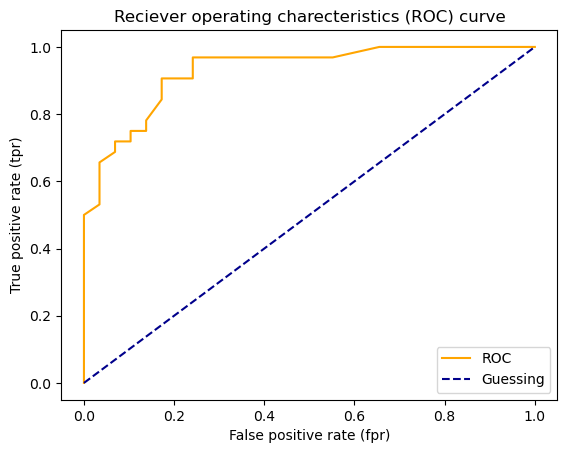

In [65]:
# Create a function for plotting ROC curves

def plot_roc_curve(fpr, tpr):
    """
    PLots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Costumize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever operating charecteristics (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [67]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9294181034482758

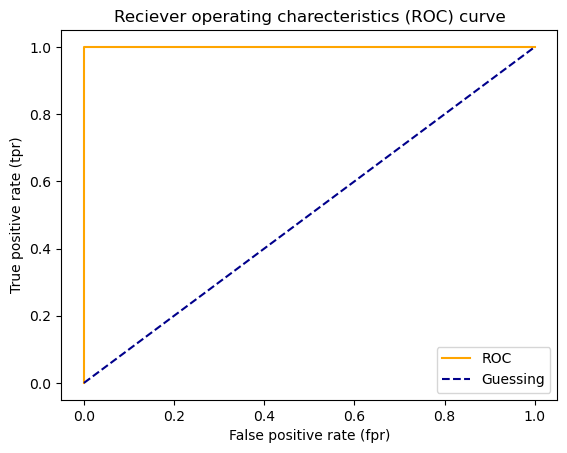

In [68]:
# Plot perfect ROC curve and AUC score
fpr, tpr, tresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [71]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the acctual labels it was suppose to predict.

In essence, giving you an idea of where the model is getting confused

In [72]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [76]:
# Visualize confusion matrix with pd.crosstab() (vrtilne tabele)
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"],
            colnames=["Predicted Labels"])
# we can see 5 false positives and 5 false negatives
# Diagonaly we have correct predictions

Predicted Labels,0,1
Actual Label,,
0,24,5
1,5,27


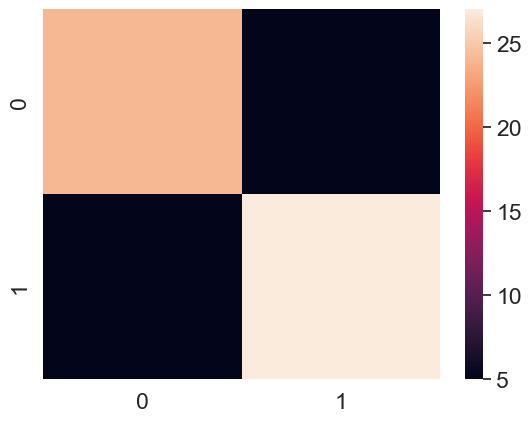

In [78]:
# Make our confusion matrix more visual with seaborn's heatmap
import seaborn as sns

#set font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#plot it using seaborn
sns.heatmap(conf_mat);

### Creating a confusion matrix using sklearn

To use the new Methodes of creating a confusion matrix you will need sklearn version 1.0+

In [80]:
import sklearn
print(sklearn.__version__)

1.4.2


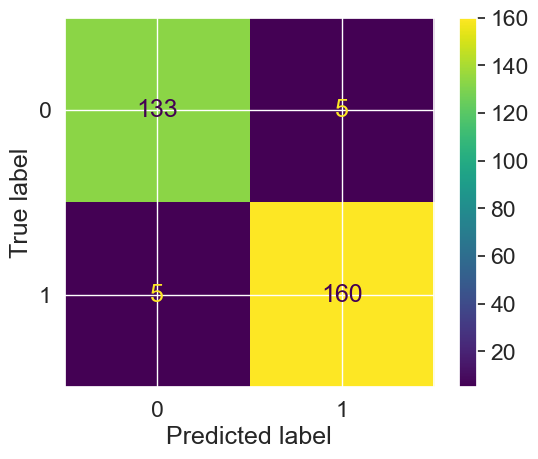

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

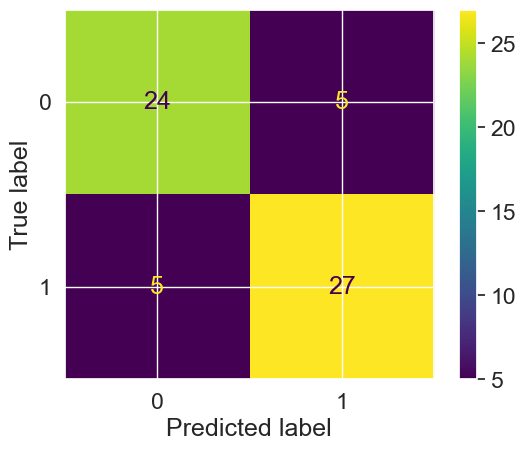

In [86]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

**Classification report**

In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))
# Macro average tells us about label imbalances -> if one label has more records than the other

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [90]:
# Where percision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # Only 1 positive case of heart disease among 10000 people

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))
# Wil result in very large class imbalance

C:\ProgramData\miniconda3\envs\env2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\miniconda3\envs\env2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\miniconda3\envs\env2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


**classification_report above tells us that 1.0 is never predicted and 0 is almost perfectly predicted -> it is good to have veriety of cases when training a model...**

To summarize classification metrics:
* **Accuracy** is a good measure to start with if all classes are balanced
* **Precision** and **recall** become more important when classes are imbalanced
* if false positive predictors are worse than false negativees, aim for higher precision
* if false nagetive predictions are worse than false positives, aim for higher recall
* **F1-score** is a combination of precision and recall

### Regression model evaluation metrics

Model evaluation metrics documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we are going to cover are:
1. R^2 (r-squared or coefficient of determination
2. Mean absoulute error (MAE)
3. Mean squared error (MSE)

In [91]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [92]:
model.score(X_test, y_test)

0.8065734772187598

In [93]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [94]:
from sklearn.metrics import r2_score

# fill an arfray with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [95]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [99]:
r2_score(y_true=y_test, y_pred=y_test_mean) # very poor model -> lowest score = 0.0 ; highest score = 1.0

0.0

**Mean absolute error (MAE)**

MAE is the average of absoulute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [102]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

**This means that each of our predictions is +- 0.3265... of y_test value**

In [104]:
df = pd.DataFrame(data={"Actual values" : y_test,
                        "Predicted values": y_preds})
df["differences"] = df["Predicted values"] - df["Actual values"]
# Difference before abs() is put over
df.head()

,Actual values,Predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [109]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [111]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [112]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,Actual values,Predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [113]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [127]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16
df_large_error.iloc[1]["squared_differences"] = 20
df_large_error.iloc[2]["squared_differences"] = 30
df_large_error.iloc[3]["squared_differences"] = 30
df_large_error.iloc[4]["squared_differences"] = 30
df_large_error.iloc[5]["squared_differences"] = 30

C:\Users\Luka\AppData\Local\Temp\ipykernel_15136\1629386698.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16
C:\Users\Luka\AppData\Local\Temp\ipykernel_15136\1629386698.py:3: FutureWarnin

In [128]:
df_large_error.head()

,Actual values,Predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.0
3024,0.45800,0.754940,0.296940,20.0
15663,5.00001,4.928596,-0.071414,30.0
20484,2.18600,2.543160,0.357160,30.0
9814,2.78000,2.331760,-0.448240,30.0


In [130]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()
# It is going to amplify the error

0.29115527131485075

#### Which regression metric model should you use?

* Pay more attention to MAE when being 10000€ off is twice as bad as being 5000€ off.
* Pay more attention to MSE when being 10000€ off is more than twice as bad as being 5000€ off.

Refer to documentation

### Finnaly using the `scoring` parameter

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) 
#if scoring =None, estimator's default scoring evaluation metric is used -> for classification problems it accuracy

cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [134]:
# cross validated accuracy
print(f"The CV accuracy is: {np.mean(cv_acc)*100:.2f}%")

The CV accuracy is: 82.48%


In [137]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy") ## default for classification
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [138]:
# Precision
np.random.seed(42)
cv_precision =  cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [140]:
# cross validated precision
print(f"The CV precision is: {np.mean(cv_precision)*100:.2f}%")

The CV precision is: 83.30%


In [141]:
# Recall
np.random.seed(42)
cv_recall =  cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [143]:
print(f"The CV recall is: {np.mean(cv_recall)*100:.2f}%")

The CV recall is: 85.45%


Let's see the `scoring` parameter being used for regression problem...

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

In [146]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None) #default metric for regression is R squared
np.mean(cv_r2)

0.6545458023124507

In [147]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [157]:
# Mean absolute error
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error") #best value would be flat zero
np.mean(cv_mae)

-0.46620501732073655

In [158]:
cv_mae

array([-0.54256026, -0.40902123, -0.43706982, -0.46918522, -0.47318856])

In [159]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error") #best value would be flat zero
np.mean(cv_mse)

-0.43099502243995547

In [160]:
cv_mse

array([-0.51296289, -0.35070541, -0.37298376, -0.44907837, -0.46924468])

### Using different evaluations as Scikit_Learn functions

The 3rd way to evaluate scikit-learn ML models/estimators is using `sklearn.metrics` module: https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Evaluate model
y_preds = clf.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_preds)

0.8524590163934426

In [163]:
precision_score(y_true=y_test, y_pred=y_preds)

0.8484848484848485

In [164]:
recall_score(y_true=y_test, y_pred=y_preds)

0.875

In [165]:
f1_score(y_true=y_test, y_pred=y_preds)

0.8615384615384616

In [167]:
# Regression problem
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)
y_preds = model.predict(X_test)
r2_score(y_true=y_test, y_pred=y_preds)

0.8065734772187598

In [168]:
mean_absolute_error(y_true=y_test, y_pred=y_preds)

0.32659871732073664

In [169]:
mean_squared_error(y_true=y_test, y_pred=y_preds)

0.2534678520824551